# Introduction to scikit learn

This notebook demonstrates some very useful functions of Scikit-learn library.

### What we're going to cover

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm and use it to make predictions on out data
4. Evaluating our model
5. Imporve the model
6. Save and load a trained model
7. Putting it all together!! 

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 0. An end-to-end Scikit-Learn workflow

In [2]:
# Get the data ready
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Now we are going to use the features(The columns like age, sex, cp etc) of this csv to predict the target values, 1 or 0

In [3]:
# Create X (Features matrix(age, sex, cp, chol etc))
X = heart_disease.drop("target", axis = 1)

# Create Y (labels (The target column))
Y = heart_disease["target"]

### If there are warnings in your noteboooks you can use this

import warnings

warnings.filterwarnings("ignore")

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier is a classifying machine learning model, it goes through a row and classifies if it's one thing or not
clf = RandomForestClassifier()

# We'll keep the deafault hyperparameters
clf.get_params()

# This was just to check the what the default parameters are

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Now we put the model and divide it into sections of training data and test data

Recall your notes about how we train a model --> train, practice, test

So we are splitting data here into train and test where the size is 0.2 for test meaning 20% data will be kept for test and rest for training

In [7]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:
# This is to tell the model to find patterns in the training data
clf.fit(X_train, Y_train)     # ; (If you don't wanna look at the fig)

RandomForestClassifier()

In [9]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2


In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3


In [11]:
# Make a prediction
Y_preds = clf.predict(X_test)
Y_preds

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [12]:
Y_test

210    0
135    1
264    0
81     1
76     1
      ..
179    0
48     1
64     1
239    0
65     1
Name: target, Length: 61, dtype: int64

In [13]:
# 4. Evaluate the model
clf.score(X_train, Y_train)

1.0

This 1.0 means that our model has done a 100% on the training data, it found the patterns!!

In [14]:
clf.score(X_test, Y_test)

0.9180327868852459

Well this means that our model scored 80% on the test data which is good news as it should not be 100% if you recall

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.94      0.92      0.93        37

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.91        61
weighted avg       0.92      0.92      0.92        61



Above here we compared test label with prediction labels

In [16]:
confusion_matrix(Y_test, Y_preds)

array([[22,  2],
       [ 3, 34]], dtype=int64)

In [17]:
accuracy_score(Y_test, Y_preds)

0.9180327868852459

In [18]:
# 5. Improve a model

# Try different amount of n_estimators
np.random.seed(25)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 91.80%

Trying model with 30 estimators...
Model accuracy on test set: 86.89%

Trying model with 40 estimators...
Model accuracy on test set: 90.16%

Trying model with 50 estimators...
Model accuracy on test set: 93.44%

Trying model with 60 estimators...
Model accuracy on test set: 86.89%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 91.80%

Trying model with 90 estimators...
Model accuracy on test set: 90.16%



In [19]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("Random_Forest_Model.pkl","wb"))

In [20]:
loaded_model = pickle.load(open("Random_Forest_Model.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.9016393442622951

This number should match with the last percentage of the test we did above, where 90 estimators had 75.41%

# 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    i. Split the data into features and labels (X and Y)
    ii. Filling (imputing) or disregarding missing values
    iii. Converting non-numerical values to numerical values(feature encoding)

In [21]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# i) Splitting data into X and Y, then using a model to split into training data and test data

In [22]:
# Now let us split it into X and Y, We take X as features to predict Y (target)
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Clean Data --> Transform Data --> Reduce Data

### 1.1 Make sure it's all numerical

In [26]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# Split into X/Y
X = car_sales.drop("Price", axis = 1)
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [29]:
Y = car_sales["Price"]
Y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [30]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2)

In [32]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [33]:
# Now we convert categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
# Why doors you might ask, well if you see the count you can say, 4 door cars belong to 856 of them, 5 door cars to 79, and 3 door cars to 65.

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
# Another way to do it
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [36]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size = 0.2)

model.fit(X_train, Y_train)

RandomForestRegressor()

In [37]:
model.score(X_test, Y_test)
# The score doesn't matter, you did what you had to, you converted the data into numerical form and made the model work

0.3235867221569877

In [38]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

### 1.2 What if there were missing values

1. Fill them with some values (aka imputation)
2. Remove the samples with missing data 

In [39]:
# Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Create X and Y
X = car_sales_missing.drop("Price", axis = 1)
Y = car_sales_missing["Price"]

In [42]:
# Let's convert our data into numbers

# Now we convert categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
# Why doors you might ask, well if you see the count you can say, 4 door cars belong to 856 of them, 5 door cars to 79, and 3 door cars to 65.

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5000 stored elements and shape (1000, 17)>

### Generally it would have had an error in earlier versions but it doesn't now, so we convert the NaN values into something and then continue modifying the table

### Option 1: To fill the data with pandas

In [43]:
# Here to use inplace, do it in this way as the one you've been doing still makes changes on a copy, These are the two methods we can use

# Fill "Make" column
car_sales_missing.fillna({"Make": "missing"}, inplace = True)

# Fill "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill "Odometer (KM)" column
car_sales_missing.fillna({"Odometer (KM)":car_sales_missing["Odometer (KM)"].mean()}, inplace = True)

# Fill "Doors" column
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [44]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
# Why doors you might ask, well if you see the count you can say, 4 door cars belong to 856 of them, 5 door cars to 79, and 3 door cars to 65.

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-learn

In [46]:
car_miss_data = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_miss_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
car_miss_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop rows with no labels

car_miss_data.dropna(subset = ["Price"], inplace = True)
car_miss_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split data into X and Y

X = car_miss_data.drop(["Price"], axis = 1)
Y = car_miss_data["Price"]

# Actually we have to split it into train and test data and then transform all of them
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Filling missing data with scikit-learn

In [50]:
from sklearn.impute import SimpleImputer


# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")


In [51]:
# Define columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

In [52]:
# Create an imputer (something that fills missing data)

from sklearn.compose import ColumnTransformer

imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                            ("door_imputer", door_imputer, door_features),
                            ("num_imputer", num_imputer, num_features)])

In [53]:
# Transform the data

filled_X_train = imputer.fit_transform(X_train)

filled_X_test = imputer.fit_transform(X_test)

filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [54]:
# Getting our transformed data arrays back to dataframes

filled_X_train_df = pd.DataFrame(filled_X_train, columns = ["Make","Colour","Doors","Odometer (KM)"])

filled_X_test_df = pd.DataFrame(filled_X_test, columns = ["Make","Colour","Doors","Odometer (KM)"])

filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [56]:
# Well great now there are no missing values

filled_X_train_df

# Let's see if it's read to be fit into the model

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0
...,...,...,...,...
755,Nissan,Blue,4.0,111256.0
756,Honda,White,4.0,246079.0
757,Honda,Blue,4.0,224900.0
758,missing,White,3.0,19482.0


In [57]:
# Well, seems it is not all numerical, so let's onehot encode it

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

In [58]:
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.fit_transform(filled_X_test_df)

transformed_X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3040 stored elements and shape (760, 15)>

#### Now that we have our data filled and converted, we can go ahead and fit it into a model

In [59]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train,Y_test = train_test_split(transformed_X,y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(transformed_X_train, Y_train)
model.score(transformed_X_test, Y_test)

0.10029498332004949

### You can go back at the top and see that we have got our data ready now, so we move to step 2

# 2. Choose the right model/algorithm

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators
* Classificatin problem = predecting a category (heart disease or not)
    * `clf` (short for classifier) used as a classification estimator
* Regression problem = predicting a number (Selling price of a car)

## 2.1 Picking a ML model for a regression problem

Let's use the california housing dataset

In [60]:
# Get the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
# housing_df["MedHouseVal"] = housing["target"]

housing_df["Target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


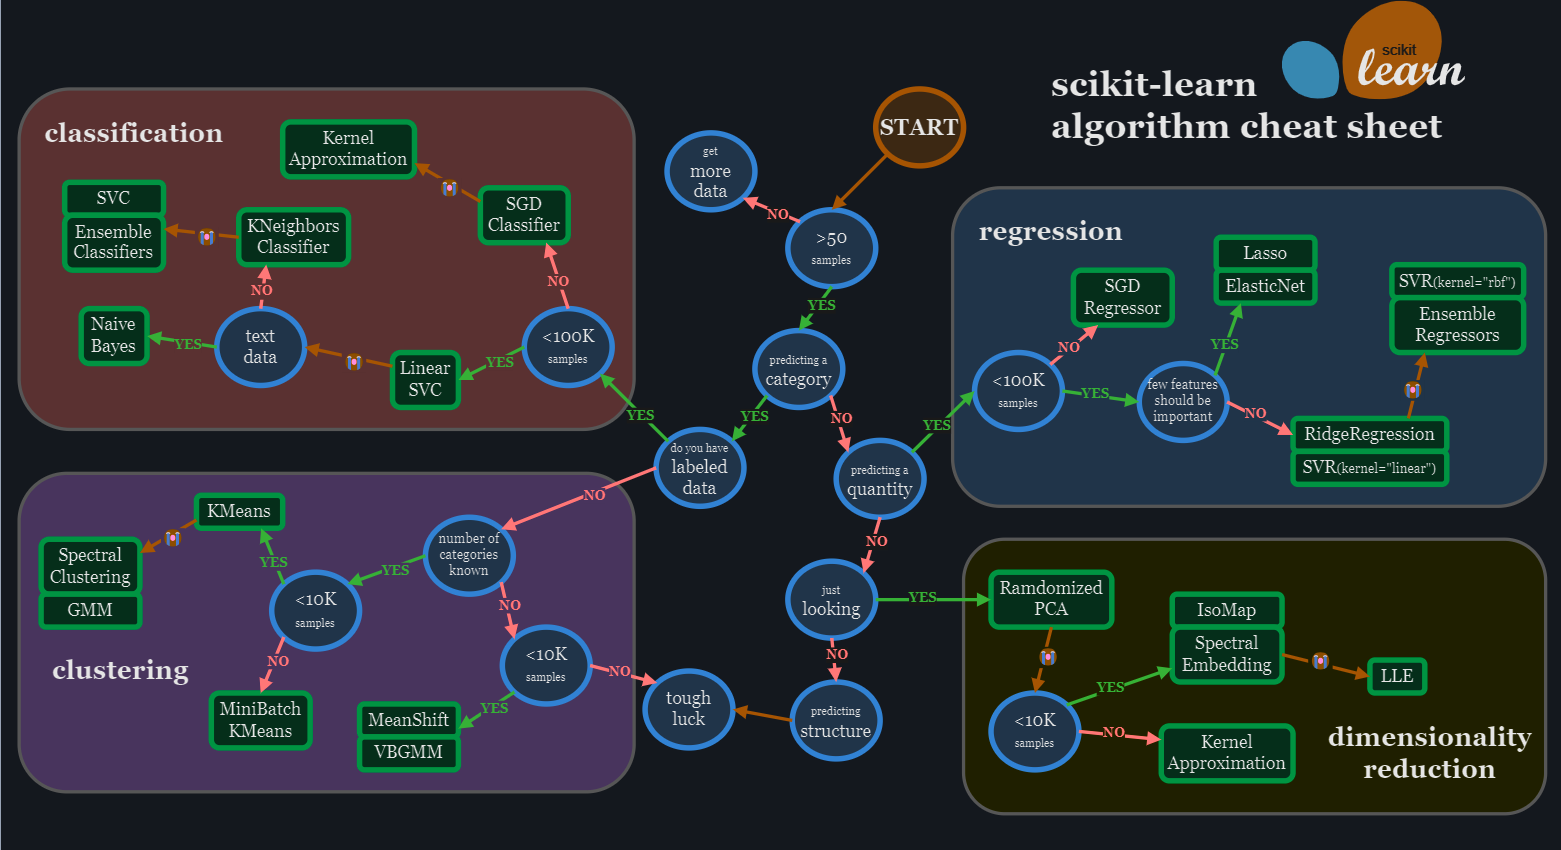

In [63]:
from PIL import Image
Image.open("ml_map.png")

In [64]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate and fit the model on training set
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.5758549611440127

### Now we will be trying the other models and see if we can improve this score
### We will try SVR(linear & rbf), Ensemble regressors, Lasso, ElasticNet

We already have written the most of the code above, so here we are only changing the model and using the values again to see the score

```
# SVR(linear)
from sklearn.svm import SVR

# Instantiate and fit the model on training set
model = SVR(kernel = "linear")
model.fit(x_train, y_train)
model.score(x_test,y_test)
```

```
# SVR(rbf)
from sklearn.svm import SVR

model = SVR(kernel = "rbf")
model.fit(x_train, y_train)
model.score(x_test, y_test)
```

In [65]:
# Lasso
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.2841671821008396

In [66]:
# ElasticNet
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.41655189098028245

In [67]:
# Ensemble method
# It is a combination of multiple small models rather than a single model to predict

# Import randomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set a seed
np.random.seed(42)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8051230593157366

### 2.2 Picking a model for classification problem

This is a practice done by me on a dataset of faces of people

In [68]:
# Import dataset
from sklearn.datasets import fetch_covtype

# Store the data set
forestCover = fetch_covtype()
forestCover

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3]),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilderness_Area_1',
  'Wilderness_Area_2',
  'Wildernes

In [69]:
# Convert data into dataframe
forestCover_df = pd.DataFrame(forestCover["data"], columns = forestCover["feature_names"])
forestCover_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
forestCover_df["Target"] = forestCover["target"]

In [71]:
forestCover_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [72]:
forestCover_df["Target"].min(), forestCover_df["Target"].max()

(1, 7)

In [73]:
# Getting the data ready
x = forestCover_df.drop(["Target"], axis = 1)
y = forestCover_df["Target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

x_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
59907,3146.0,81.0,13.0,540.0,-28.0,4000.0,237.0,216.0,107.0,4307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13152,2284.0,292.0,21.0,268.0,102.0,1243.0,156.0,231.0,213.0,834.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408144,3242.0,324.0,11.0,566.0,111.0,1860.0,192.0,228.0,176.0,2190.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512266,2801.0,99.0,7.0,95.0,18.0,1913.0,233.0,230.0,130.0,1871.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319604,3050.0,16.0,12.0,134.0,23.0,2851.0,209.0,214.0,141.0,1215.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223165,3009.0,97.0,35.0,636.0,-48.0,1008.0,251.0,168.0,15.0,1275.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561353,2663.0,47.0,16.0,376.0,20.0,3178.0,224.0,203.0,109.0,2981.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196769,3033.0,40.0,7.0,644.0,53.0,1396.0,221.0,224.0,138.0,2531.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202283,3140.0,62.0,18.0,150.0,17.0,5008.0,233.0,199.0,92.0,1283.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


```
# Importing a model (SGD)
from sklearn.linear_model import SGDClassifier

# Fit the data into model
model = SGDClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)
```

### Well that's a lot of data and takes ages to train, so we continue with our course

In [74]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The map says to try Linear SVC

In [75]:
# Import linear SVC
from sklearn.svm import LinearSVC

# Set random seed
np.random.seed(42)

# Create data X and Y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Instantiate the model
model = LinearSVC()
model.fit(x_train,y_train)

# Evaluate model accuracy
model.score(x_test, y_test)

0.8688524590163934

Well it works great, but we continue to follow the course and see other model

We skip Kneighbours and go to ensemble classifiers

In [76]:
# Import linear SVC
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(42)

# Create data X and Y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Instantiate the model
model = RandomForestClassifier()
model.fit(x_train,y_train)

# Evaluate model accuracy
model.score(x_test, y_test)

0.8524590163934426

### Note:
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model and use it to make predictions on data

### 3.1 Fitting the model

 * X = features/ feature variables/ data
 * Y = Labels/ targets/ target variables/ ground true

In [77]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(42)

# Create data X and Y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Instantiate the model
model = RandomForestClassifier()

# Fit the model to the data (Training the ML model)
model.fit(x_train,y_train)

# Evaluate model accuracy (Using the patterns learned)
model.score(x_test, y_test)

0.8524590163934426

### 3.2 Making predictions using the machine learning model

Main 2 ways to make predictions:
 * predict()
 * predict_proba()

In [78]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [79]:
# Use a trained model to make predictions

model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
model.predict(x_test) == np.array(y_test)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [82]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [83]:
# This comes under 4. Evaluating a model, but we are just checking it for now
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [84]:
# predict_proba returns probabilities of a classification
model.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [85]:
# Let's predict on the same data...
model.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used on regression models

In [86]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

In [88]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [89]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [90]:
len(y_test), len(y_preds)

(4128, 4128)

In [91]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn estimators/models:
 * Estimators built-in `score()` method
 * The `scoring` parameter
 * Problem-specific metric function

In [92]:
### 4.1 Evaluating model with `score()` method

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
model.score(x_train, y_train)

1.0

In [94]:
model.score(x_test, y_test)

0.8524590163934426

Use the `score()` method on a regression dataset....Which we have done before so just copy paste it for now

In [95]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(x_train, y_train)

RandomForestRegressor()

In [96]:
model.score(x_train, y_train)

0.9736801960414609

In [97]:
# Default score() evaluation is r^2 for regression algorithms
model.score(x_test, y_test)

0.8065734772187598

## 4.2 Evaluating a model with scoring parameter

In [98]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train);

In [99]:
model.score(x_test, y_test)

0.8524590163934426

In [100]:
cross_val_score(model, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [101]:
cross_val_score(model, x, y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [102]:
np.random.seed(42)

# Single test score
model_score = model.score(x_test, y_test)

# Mean of 5-Fold cross-validation score
model_cv_score = np.mean(cross_val_score(model, x, y))

# Compare the two
model_score, model_cv_score

(0.8524590163934426, 0.8248087431693989)

In [103]:
# Default scoring parameter of classifier = mean accuracy

# Scoring parameter set to None by default
cross_val_score(model, x, y, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classfication model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Here no need to split the data
model = RandomForestClassifier()
cv_score = cross_val_score(model, x, y, cv = 5)
cv_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [105]:
np.mean(cv_score)

0.8248087431693989

In [106]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cv_score)*100:.2f} %")

Heart Disease Classifier Cross-Validated Accuracy: 82.48 %


**Area under the reciever operating characteristic curve (AUC/ROC)**

ROC curves are a comparision of a models true postivite rate (TPR) versus a models false positive rate (FPR).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [107]:
# Creating x_test again to be sure
x_test
# Well it is the heart disease data, so no need to create

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [108]:
from sklearn.metrics import roc_curve

# Fit the model to the data
model.fit(x_train, y_train)

# Make predictions with probability
y_probs = model.predict_proba(x_test)

y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [109]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57, 0.77,
       0.29, 0.91, 0.07, 0.94, 0.96, 0.99, 0.14, 0.04, 0.05, 0.5 , 0.16,
       0.64, 0.69, 0.69, 0.64, 0.8 , 0.77, 0.14, 0.86, 0.1 , 0.05, 0.05,
       0.36, 0.51, 0.12, 0.51, 0.87, 0.69, 0.87, 0.86, 0.83, 0.81, 0.64,
       0.71, 0.19, 0.64, 1.  , 0.17, 0.03, 0.16, 0.17, 0.77, 0.7 , 0.17,
       0.07, 0.35, 1.  , 0.11, 0.  , 0.14])

In [110]:
# Calculate fpr, tpr, threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

# Check False positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

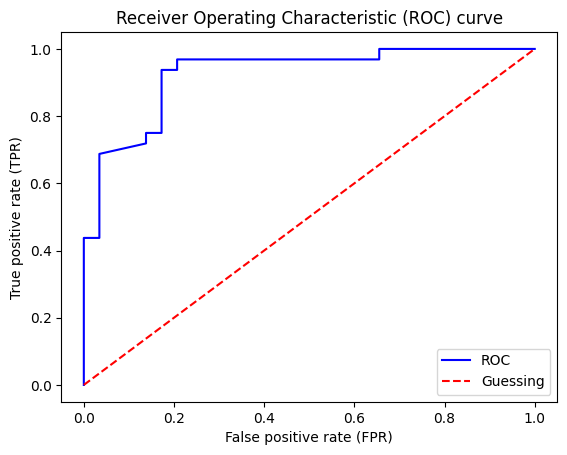

In [111]:
# Create a fuction for poltting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """

    # Plot roc curve
    plt.plot(fpr, tpr, color = "blue", label = "ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color = "red", linestyle = "--", label = "Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [112]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

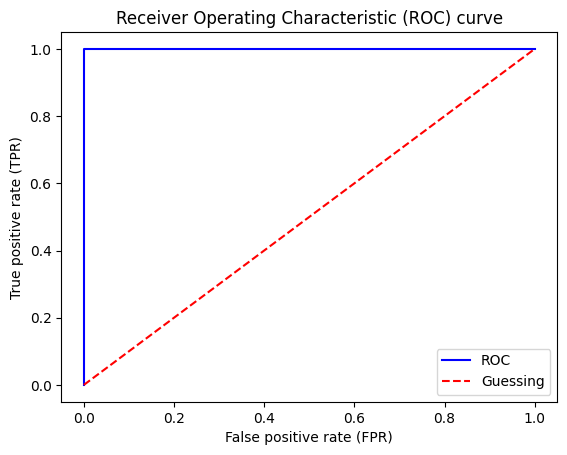

In [113]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [114]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is confused.

In [115]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [116]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames = ["Actual Labels"], colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


```
import sys
!conda install --yes --prefix {sys.prefix} seaborn 
```

<Axes: >

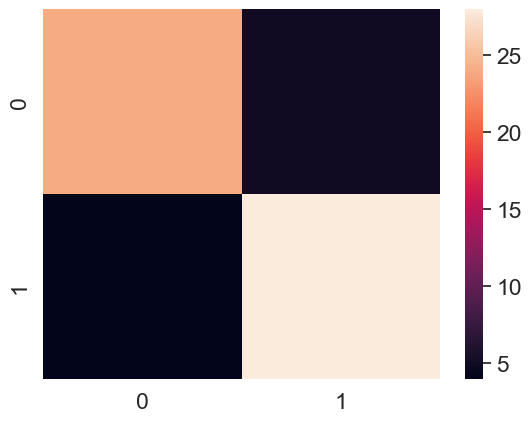

In [117]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Plot using seaborn
sns.heatmap(conf_matrix)

#### Creating a confusion matrix with scikit-learn

In [118]:
import sklearn
sklearn.__version__

'1.5.1'

In [119]:
model

RandomForestClassifier()

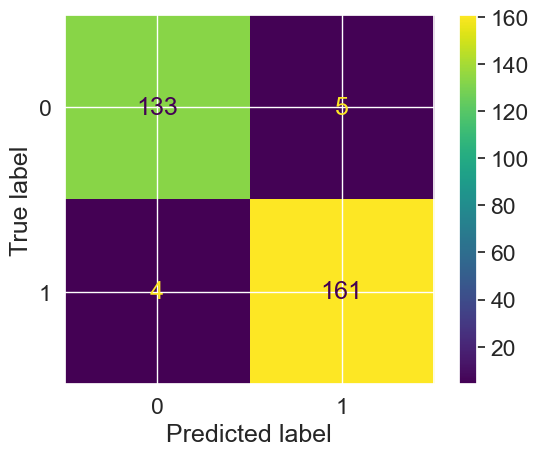

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
;
ConfusionMatrixDisplay.from_estimator(model, x, y)

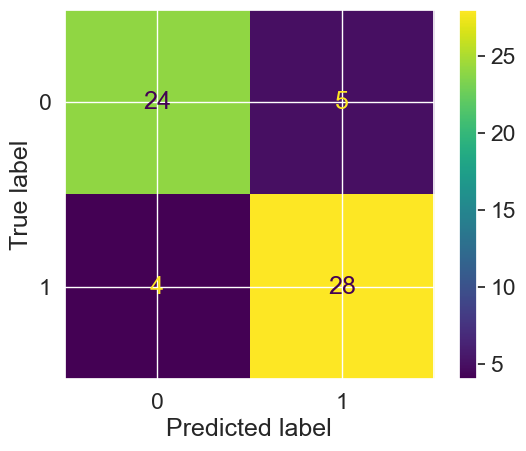

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

**Classification Report**

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [127]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as zero

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (eg. same amount of samples which are labeled with 0 or 1)
* **Precision** and **recall** become more important when classes are imbalanced
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

The one's we are going to cover are:
1. R^2 (r-squared/ coefficient of determination)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

It compares your models predictions to the mean of targets. Values can range from negative infinty (a very poor model) to 1. 
For eg. if all your model does is predict the mean of targets, it's R^2 value would be 0. And if your model perfectly predicts the range of numbers it's R^2 value would be 1

In [130]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [131]:
model.score(x_test, y_test)

0.8065734772187598

In [132]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [133]:
r2_score(y_test, y_test_mean)

0.0

In [134]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of absolute differences between predictions and actual values.

It gives you and idea of how wrong your model predictions are.

In [139]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [140]:
df = pd.DataFrame(data = {"actual values": y_test,
                            "predicted values": y_preds})

df["diffs"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,diffs
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [141]:
df["diffs"].mean()

0.012048392126937589

In [143]:
# Now MAE and mean of diffs is different aa MAE gets rid of negative values, so
np.abs(df["diffs"]).mean()

0.32659871732073664

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [145]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [147]:
df["squared diffs"] = np.square(df["diffs"])
df

,actual values,predicted values,diffs,squared diffs
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [148]:
# Calculate MSE by hand
squa = np.square(df["diffs"])
squa.mean()

0.2534678520824551

In [174]:
df_error = df.copy()
df_error.iloc[:100]["squared diffs"] = 20
df_error

C:\Users\utkar\AppData\Local\Temp\ipykernel_21576\3526667407.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_error.iloc[:100]["squared diffs"] = 20
C:\Users\utkar\AppData\Local\Temp\ipykernel_21576\3526667407.py:2: SettingWithCopyWarn

,actual values,predicted values,diffs,squared diffs
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [175]:
# Calculate MSE with large error
df_error["squared diffs"].mean()

0.2534678520824551

### 4.2.3 Finally using the `scoring` parameter

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [177]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = None) # if scoring = None, estimators default scoring evaluation metric is used which is accuracy for classification models
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [179]:
# Cross-validated accuracy
print(f"Cross-validated accuracy is: {np.mean(cv_acc)* 100:.2f}%")

Cross-validated accuracy is: 82.48%


In [181]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [182]:
# Cross-validated accuracy
print(f"Cross-validated accuracy is: {np.mean(cv_acc)* 100:.2f}%")

Cross-validated accuracy is: 82.48%


In [184]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [187]:
# Cross-validated precision
print(f"Cross-validated precision is: {np.mean(cv_precision)}")

Cross-validated precision is: 0.8329547346025924


In [188]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [191]:
# Cross-validated recall
print(f"Cross-validated recall is: {np.mean(cv_recall)}")

Cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being used for a regression problem...

In [192]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

model = RandomForestRegressor()

In [193]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv = 3, scoring = None)
np.mean(cv_r2)

0.6545458023124507

In [194]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, x, y, cv = 3, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.4835773816036823

In [196]:
cv_mae

array([-0.51754565, -0.42678172, -0.50640477])

In [195]:
# Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, cv = 3, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.46141356443710196

In [197]:
cv_mse

array([-0.51017222, -0.33368897, -0.5403795 ])

## 4.3 Using different evaluation metrics as Scikit-learn functions

3rd way to evaluate scikit-learn MLs/ estimators is to use the `sklearn.metrics` module

In [205]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create x & y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Create model
clf = RandomForestClassifier()

# Fit the model to data
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

In [207]:
# Evaluate using evaluation functions
print("Classifier metrics on test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f} %")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f} %")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f} %")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f} %")

Classifier metrics on test set
Accuracy: 73.77 %
Precision: 81.82 %
Recall: 72.97 %
F1: 77.14 %


In [208]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create x & y
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Create model
model = RandomForestRegressor()

# Fit the model to data
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

In [214]:
# Evaluate using evaluation functions
print("Regression metrics on test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on test set
R^2: 0.8205570145019443
MAE: 0.3140407698401164
MSE: 0.22822045217684442


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From the data perspective:
* Could we collect more data? (more the data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use? 
* Could we improve the current model?

Parameters vs. Hyperparameters
* Parameters = Model finds these patterns in data
* Hyperparameters = Settings on a model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust hyperparameters:**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [215]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

### 5.1 Tuning hyperparemeters by hand

Here comes the validation set (Practice exam) from the train, validate and test sets.... we tune the parameters in this set

**Note:**
* A model is **trained** on training set of data
* Hyperparameters **tuned** on the validation set 
* And **evaluated** on the test set 

So let's make them

In [217]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [231]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs. y_preds labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
                    "precision" : round(precision, 2),
                    "recall" : round(recall, 2),
                    "f1" : round(f1, 2)}

    print(f"Acc: {accuracy * 100:.2f} %")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1 score: {f1:.2f}")
    
    return metric_dict

In [222]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Well we don't a module to convert the data into 3 splits, so we do it manually

In [223]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Create the data
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))  # 15% of the data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

# test_split = round(0.15 * len(heart_disease_shuffled))  (15% of the data) No need of this as we put the rest of the data into x_test, y_test

len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [224]:
train_split

212

In [225]:
valid_split

257

In [226]:
x_valid

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2


In [227]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [233]:
# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22 %
Precision: 0.81
Recall: 0.88
f1 score: 0.85


In [234]:
baseline_metrics

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [235]:
# The course changed the n_estimators to 100 which is default now, so let's change something else

np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(max_depth = 10)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00 %
Precision: 0.81
Recall: 0.84
f1 score: 0.82


We can see, doing it by hand is a lot of work which is against coding rules. So let's go to RandomSearchCV

### 5.2 Hyperparameter tuning with Randomized Search CV (cross validation)

In [246]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [2, 4, 6],
        "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# Because we are going to use cross validation (cv), we don't need a validation set

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV 
rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid,
                            n_iter = 10, # No. of models to try
                            cv = 5,
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

In [247]:
# This is just to figure out the fits that didn't happen and optimize it, if you can understand it
rs_clf.cv_results_

{'mean_fit_time': array([4.41407194e+00, 1.97472572e-03, 7.33045053e-01, 3.13472748e-04,
        4.31553841e-02, 3.20181847e-03, 1.89198222e+00, 7.52769566e-01,
        1.97706223e-03, 3.87849679e+00]),
 'std_fit_time': array([0.11138364, 0.00394945, 0.01369829, 0.00062695, 0.00731358,
        0.00392141, 0.03159216, 0.04692429, 0.00366395, 0.1058398 ]),
 'mean_score_time': array([0.12021384, 0.        , 0.02383194, 0.        , 0.0032227 ,
        0.        , 0.06307101, 0.02183104, 0.        , 0.11885438]),
 'std_score_time': array([0.00618361, 0.        , 0.00406705, 0.        , 0.00294632,
        0.        , 0.00842994, 0.00347036, 0.        , 0.01006641]),
 'param_n_estimators': masked_array(data=[1200, 100, 200, 100, 10, 10, 500, 200, 200, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[6, 4, 2, 6, 4, 4, 6, 6, 4, 4],
              mask=[

In [248]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [250]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97 %
Precision: 0.77
Recall: 0.86
f1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [251]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

**RandomizedSearchCV**

We have the n_iter parameter where you can chose the random no. of combinations to execute from the grid

**GridSearchCV**

Here we brute force all the combinations in the grid 

In [254]:
# Total combinations of parameters
6*5*2*3*3*5 # The last 5 is for cross validation

2700

Seems we need to train 2700 models with different parameters and stuff, and you are in a laptop, better not to do that

So we create a grid with less stuff in it

In [259]:
# We take our best hyperparameters and take values around them in this grid
grid_2 = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [260]:
3*1*2*1*2*5

60

In [261]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# Because we are going to use cross validation (cv), we don't need a validation set

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf, 
                            param_grid = grid_2,
                            cv = 5,
                            verbose = 2)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

In [262]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [263]:
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97 %
Precision: 0.77
Recall: 0.86
f1 score: 0.81


Let's compare our different model metrics.

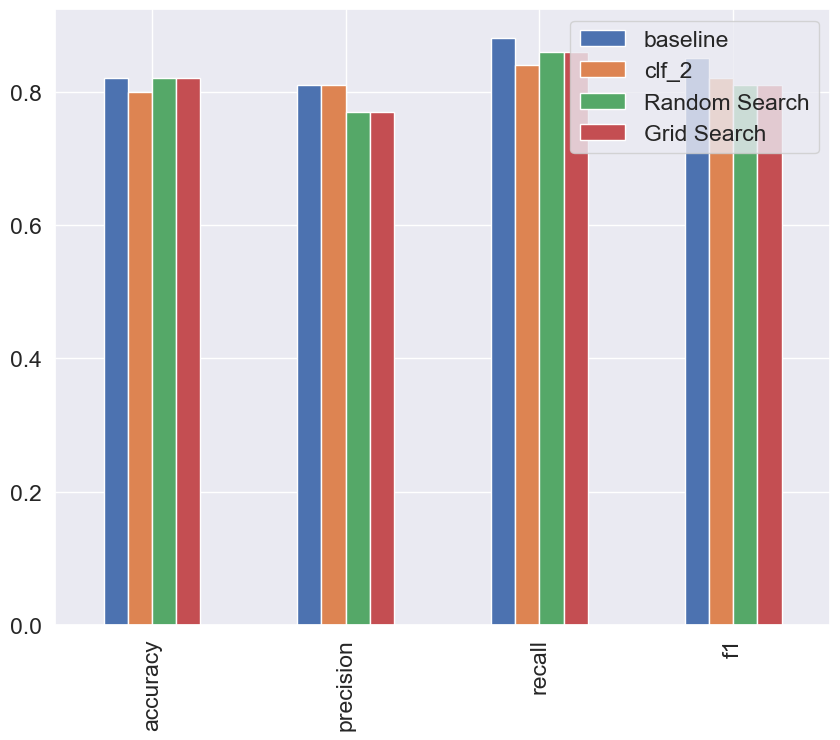

In [266]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "Random Search": rs_metrics,
                                "Grid Search": gs_metrics})

compare_metrics.plot.bar(figsize = (10, 8));

## 6. Save and load a trained model

Two ways to save and load machine learning model:
1. With python's `pickle` module
2. With the `joblib` module

**Pickle**

In [267]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", 'wb'))

In [268]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [269]:
# Make some predictions to see if the model is loaded or not
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97 %
Precision: 0.77
Recall: 0.86
f1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [270]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename = "gs_random_forest_model_1_copy.joblib")

['gs_random_forest_model_1_copy.joblib']

In [271]:
# Load the saved model
loaded_joblib_model = load(filename = "gs_random_forest_model_1_copy.joblib")

In [272]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97 %
Precision: 0.77
Recall: 0.86
f1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

It is better to use joblib's dump and load with bigger arrays in your dataset, here we have a dataset of only 303 so pickle is fine 

## 7. Putting it all together!

We will be using pipelining, multi-prossesing baby!!

In [275]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [276]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [277]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [278]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill the missing data
2. Convert data into numbers
3. Build a model on the data

In [281]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data = data.dropna(subset = ["Price"])

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "constant", fill_value = "Missing")), ("onehot", OneHotEncoder(handle_unknown = "ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "constant", fill_value = 4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "mean"))])

# Setup preprocessing steps(fill missing values then convert to numbers)
preprocessor = ColumnTransformer(
                        transformers = [
                            ("cat", categorical_transformer, categorical_features),
                            ("door", door_transformer, door_feature),
                            ("num", numeric_transformer, numeric_features)
                        ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps = [("preprocessor", preprocessor), 
                        ("model", RandomForestRegressor())])

# Split data
x = data.drop("Price", axis = 1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22027638379177727

It's also possible to run `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [285]:
# Use GridSearchCV with our regression pipeline
pipe_grid = { # These long strings with double "_" are like paths, from model -> max_depth...etc
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2, error_score = "raise")
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [ ]:
gs_model.score(x_test, y_test)